In [1]:
#import required libraries

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Admin\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Upload the dataset from Kaggle

In [3]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#let's try one-hot encode our dataframe so that its all numbers

# METHOD 1 (Without using MinMaxScaler & OneHotEncoder)

# Convert all the categorical variables to dummies

In [5]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


# Convert the boolean data into integer format and put them in a separate dataframe

In [6]:
df_insurance_one_hot_bool_to_int = insurance_one_hot.select_dtypes(include = bool).astype(int)
df_insurance_one_hot_bool_to_int

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1


# Get the non boolean data & put them in a seprate dataframe

In [7]:
insurance_one_hot_non_bool_columns = insurance_one_hot.columns.difference(insurance_one_hot.select_dtypes(include = bool).columns)
df_insurance_one_hot_non_bool = insurance_one_hot[insurance_one_hot_non_bool_columns]
df_insurance_one_hot_non_bool.head()

,age,bmi,charges,children
0,19,27.900,16884.92400,0
1,18,33.770,1725.55230,1
2,28,33.000,4449.46200,3
3,33,22.705,21984.47061,0
4,32,28.880,3866.85520,0


# concatenate the non boolean data with the boolean data

In [8]:
df_insurance_master = pd.concat([df_insurance_one_hot_non_bool,df_insurance_one_hot_bool_to_int],axis = 1)
df_insurance_master.head()

,age,bmi,charges,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,1,0,0,1,0,0,0,1
1,18,33.770,1725.55230,1,0,1,1,0,0,0,1,0
2,28,33.000,4449.46200,3,0,1,1,0,0,0,1,0
3,33,22.705,21984.47061,0,0,1,1,0,0,1,0,0
4,32,28.880,3866.85520,0,0,1,1,0,0,1,0,0


# Create X & y values (features and labels)

In [9]:
X = df_insurance_master[df_insurance_master.columns.difference(['charges'])]
y = df_insurance_master['charges']

# View X

In [10]:
X.head()

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,0,0,0,1,1,0,0,1
1,18,33.770,1,0,0,1,0,0,1,1,0
2,28,33.000,3,0,0,1,0,0,1,1,0
3,33,22.705,0,0,1,0,0,0,1,1,0
4,32,28.880,0,0,1,0,0,0,1,1,0


# View y

In [11]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

# create training and test sets

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

# Build a neural network using train_X and train_y

In [15]:
#create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation=None),
    tf.keras.layers.Dense(1,activation=None)
])

#compile the model
insurance_model.compile(loss =tf.keras.losses.mae,
                       optimizer = tf.keras.optimizers.SGD(),
                       metrics =['mae'])

#fit the model
insurance_model.fit(X_train,y_train,epochs =100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9804.3076 - mae: 9804.3076    
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7194.9512 - mae: 7194.9512
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7589.7583 - mae: 7589.7583 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7851.4595 - mae: 7851.4595
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7490.1724 - mae: 7490.1724 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8019.0562 - mae: 8019.0562 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7743.3198 - mae: 7743.3198 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 7801.6660 - mae: 7801.6660
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7967.2246 - mae: 7967.2246 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7527.1211 - mae: 7527.1211
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7873.7046 - mae: 7873.7046 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 7817.0835 - mae: 7817.0835
Epoch 69/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7412.3457 - mae: 7412.3457 
Epoch 70/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7511.3657 - mae: 7511.3657
Epoch 71/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7190.8154 - mae: 7190.8154
Epoch 72/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7245.9194 - mae: 7245.9194 
Epoch 73/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7408.8779 - mae: 7408.8779 
Epoch 74/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7300.2285 - mae: 7300.2285 
Epoch 75/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7705.3491 - mae: 7705.3491
Epoch 76/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7237.9351 - mae: 7237.9351 
Epoch 77/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6940.5605 - mae: 6940.5605
Epoch 78/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7229.0542 - mae: 7229.0542 
Epoch 79/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/s

In [16]:
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8031.6494 - mae: 8031.6494  


[7994.1279296875, 7994.1279296875]

In [17]:
y_train.median(),y_train.mean()

(9575.4421, 13346.089736364485)

In [18]:
##right now it looks like our model is not performing too well....let's try to improve this

# New model with more hidden layers , changed the optimizer to Adam

In [19]:
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation = None),
    tf.keras.layers.Dense(10,activation = None),
    tf.keras.layers.Dense(1,activation = None)
])

insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics =['mae']
                          )

insurance_model_2.fit(X_train,y_train,epochs =100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14135.8223 - mae: 14135.8223
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12534.3262 - mae: 12534.3262 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13701.7988 - mae: 13701.7988 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12116.1680 - mae: 12116.1680 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11099.0947 - mae: 11099.0947
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9112.5586 - mae: 9112.5586
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8075.2671 - mae: 8075.2671 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7729.5439 - mae: 7729.5439 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7870.8574 - mae: 7870.8574 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7622.9819 - mae: 7622.9819 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7190.2466 - mae: 7190.2466
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6054.6235 - mae: 6054.6235 
Epoch 69/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6311.6812 - mae: 6311.6812 
Epoch 70/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 5819.2041 - mae: 5819.2041
Epoch 71/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6127.0137 - mae: 6127.0137 
Epoch 72/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5399.0674 - mae: 5399.0674 
Epoch 73/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6283.8760 - mae: 6283.8760
Epoch 74/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5729.1328 - mae: 5729.1328 
Epoch 75/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5882.5527 - mae: 5882.5527 
Epoch 76/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5652.1592 - mae: 5652.1592 
Epoch 77/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5939.6792 - mae: 5939.6792 
Epoch 78/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5515.6191 - mae: 5515.6191 
Epoch 79/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

In [20]:
insurance_model_2.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4908.6113 - mae: 4908.6113  


[4770.69482421875, 4770.69482421875]

# insurance model 3 with epochs = 200 keeping everything else same as model 2

In [21]:
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation = None),
    tf.keras.layers.Dense(10,activation = None),
    tf.keras.layers.Dense(1,activation = None)
])

insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics =['mae']
                          )

history = insurance_model_3.fit(X_train,y_train,epochs =200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14003.1035 - mae: 14003.1035
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13751.4404 - mae: 13751.4404
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12954.9893 - mae: 12954.9893 
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12438.2402 - mae: 12438.2402 
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11143.2188 - mae: 11143.2188 
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10182.7871 - mae: 10182.7871 
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8335.6689 - mae: 8335.6689 
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7128.8799 - mae: 7128.8799 
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7208.5903 - mae: 7208.5903 
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6992.4092 - mae: 6992.4092 
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7370.3970 - mae: 7370.3970 
Epoch 12/200
34/34 ━━━━━━━━━━━━

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6322.3774 - mae: 6322.3774 
Epoch 69/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6198.0244 - mae: 6198.0244 
Epoch 70/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6624.6675 - mae: 6624.6675   
Epoch 71/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5557.3462 - mae: 5557.3462 
Epoch 72/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6478.3242 - mae: 6478.3242 
Epoch 73/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5664.5659 - mae: 5664.5659 
Epoch 74/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6169.7964 - mae: 6169.7964 
Epoch 75/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5960.7993 - mae: 5960.7993
Epoch 76/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5663.3115 - mae: 5663.3115
Epoch 77/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5739.7490 - mae: 5739.7490 
Epoch 78/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6087.6997 - mae: 6087.6997
Epoch 79/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4026.0918 - mae: 4026.0918 
Epoch 136/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3773.2166 - mae: 3773.2166 
Epoch 137/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3931.9104 - mae: 3931.9104
Epoch 138/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3712.5696 - mae: 3712.5696 
Epoch 139/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4092.1379 - mae: 4092.1379
Epoch 140/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3450.3674 - mae: 3450.3674
Epoch 141/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4009.5564 - mae: 4009.5564
Epoch 142/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3637.5193 - mae: 3637.5193 
Epoch 143/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3745.5540 - mae: 3745.5540
Epoch 144/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3978.3511 - mae: 3978.3511 
Epoch 145/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 3714.4370 - mae: 3714.4370
Epoch 146/200
34/34 ━━━━━━━━━━━━━━━━━━━

In [22]:
insurance_model_3.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 3576.9082 - mae: 3576.9082   


[3501.56494140625, 3501.564697265625]

In [23]:
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8031.6494 - mae: 8031.6494 


[7994.1279296875, 7994.1279296875]

Text(0.5, 0, 'epochs')

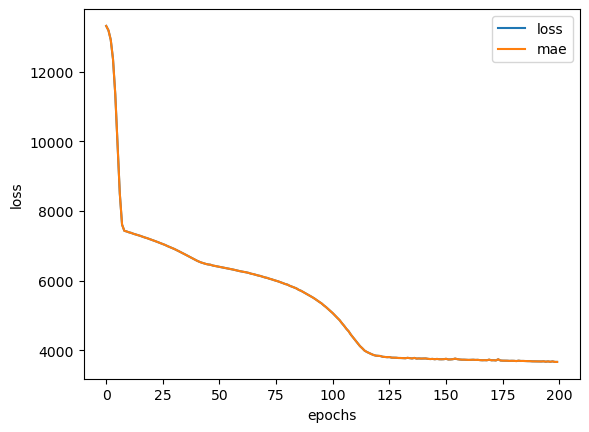

In [24]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


# how long you should train for?

it depends.really....on the problem you are working on.the solution is in earlystoppingcallback 
which is atensor flow component you can add to your neural network for improving a certain metric

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

# Preprocessing of data (Normalization & Standardization)

In [25]:
##In terms of scaling values,neural networks tend to prefer normalization
##The models converge better if the feature variables are normalized

In [26]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Upload the dataset from Kaggle

In [27]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [28]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

# select the numeric columns other than y column (Charges)

In [29]:
insurance.select_dtypes(include = ['number']).columns.difference(['charges'])

Index(['age', 'bmi', 'children'], dtype='object')

# select the categorical columns

In [30]:
insurance.select_dtypes(include = ['object']).columns

Index(['sex', 'smoker', 'region'], dtype='object')

# create a column transformer MinMaxScaler for numeric columns and OneHotEncoder for categorical columns

In [31]:
ct = make_column_transformer((MinMaxScaler(),insurance.select_dtypes(include = ['number']).columns.difference(['charges'])),
     (OneHotEncoder(handle_unknown = "ignore"),insurance.select_dtypes(include = ['object']).columns))

# Create X & y

In [32]:
X = insurance.drop("charges",axis=1)
y = insurance['charges']

# Build our train and test sets

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =42)

In [34]:
#fit the column transformer to our taining data
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 Index(['age', 'bmi', 'children'], dtype='object')),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 Index(['sex', 'smoker', 'region'], dtype='object'))])

# Transform training and test data with normalization (MinMaxSacler &  OneHotEncoder)

In [35]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [36]:
#What does our data look like now
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [37]:
X_train.shape , X_train_normal.shape

((1070, 6), (1070, 11))

# Our data has been normalized and one hot encoded. Now neural network can be built on top of this
#Build a neural network model to fit on our normalized data

In [38]:
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
                    tf.keras.layers.Dense(100,activation = None),
                    tf.keras.layers.Dense(10,activation = None),
                    tf.keras.layers.Dense(1,activation = None)])

insurance_model_4.compile(loss =tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])

insurance_model_4.fit(X_train_normal,y_train,epochs = 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13297.1172 - mae: 13297.1172
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13290.0234 - mae: 13290.0234 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13272.0332 - mae: 13272.0332 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13233.0801 - mae: 13233.0801 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13161.9229 - mae: 13161.9229 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 13047.9619 - mae: 13047.9619
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12880.8281 - mae: 12880.8281 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12650.1152 - mae: 12650.1152 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12345.9316 - mae: 12345.9316 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11960.6221 - mae: 11960.6221 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11500.9990 - mae: 11500.9990
Epoch 12/100
34/34 ━

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4252.2261 - mae: 4252.2261
Epoch 69/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4153.0874 - mae: 4153.0874
Epoch 70/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4062.6870 - mae: 4062.6870
Epoch 71/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3978.6321 - mae: 3978.6321
Epoch 72/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3903.5657 - mae: 3903.5657
Epoch 73/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3835.1162 - mae: 3835.1162
Epoch 74/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3780.8105 - mae: 3780.8105
Epoch 75/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3735.0010 - mae: 3735.0010
Epoch 76/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3700.4329 - mae: 3700.4329
Epoch 77/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3676.4592 - mae: 3676.4592
Epoch 78/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3658.4841 - mae: 3658.4841
Epoch 79/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

# Evaluate our insurance model trained on normalized data

In [39]:
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3518.0938 - mae: 3518.0938  


[3432.185302734375, 3432.185302734375]

In [40]:
tf.random.set_seed(42)

insurance_model_5 = tf.keras.Sequential([
                    tf.keras.layers.Dense(100,activation = None),
                    tf.keras.layers.Dense(10,activation = None),
                    tf.keras.layers.Dense(1,activation = None)])

insurance_model_5.compile(loss =tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
                          metrics = ['mae'])

insurance_model_5.fit(X_train_normal,y_train,epochs = 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 11152.8105 - mae: 11152.8105
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5488.6602 - mae: 5488.6602
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3793.7759 - mae: 3793.7759
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3891.3462 - mae: 3891.3462
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3850.6746 - mae: 3850.6746
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3786.6184 - mae: 3786.6184
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3743.7788 - mae: 3743.7788
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3790.6040 - mae: 3790.6040
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3778.7734 - mae: 3778.7734
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3797.7168 - mae: 3797.7168
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3833.9133 - mae: 3833.9133
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3803.4597 - mae: 3803.4597
Epoch 69/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3822.0774 - mae: 3822.0774
Epoch 70/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3795.4695 - mae: 3795.4695
Epoch 71/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3818.3848 - mae: 3818.3848
Epoch 72/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3824.7815 - mae: 3824.7815
Epoch 73/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3827.7837 - mae: 3827.7837
Epoch 74/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3755.1685 - mae: 3755.1685
Epoch 75/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3808.1042 - mae: 3808.1042
Epoch 76/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3814.9456 - mae: 3814.9456
Epoch 77/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3805.0315 - mae: 3805.0315
Epoch 78/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3801.1997 - mae: 3801.1997
Epoch 79/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

In [41]:
insurance_model_5_preds = insurance_model_5.predict(X_test_normal)
insurance_model_5_preds

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[10428.651 ],
       [ 7130.734 ],
       [45671.137 ],
       [10222.475 ],
       [33105.6   ],
       [ 6700.8633],
       [ 2068.9631],
       [14581.809 ],
       [ 4513.4595],
       [11210.567 ],
       [36471.965 ],
       [ 8730.844 ],
       [ 5489.0723],
       [42175.8   ],
       [44652.16  ],
       [41832.566 ],
       [12109.028 ],
       [41905.79  ],
       [10021.511 ],
       [39960.914 ],
       [ 4804.0645],
       [ 8960.914 ],
       [ 1475.0137],
       [ 4199.594 ],
       [12073.132 ],
       [12483.917 ],
       [13522.606 ],
       [ 5952.5044],
       [11055.877 ],
       [ 1490.5953],
       [ 9407.231 ],
       [12946.59  ],
       [ 3207.156 ],
       [ 6156.6943],
       [ 3770.6035],
       [ 9829.645 ],
       [ 2824.3513],
       [ 9011.317 ],
       [42662.51  ],
       [38207.027 ],
       [ 4071.6306],
       [ 3193.3389],
       [12891.499 ],
       [12493.924 ],
       [ 6728.8174],
       [12597.508 ],
       [ 4094.4485],
       [ 4620

# converting the y_test & insurance_model_5_preds_squeeze variable to numpy array

In [42]:
y_test_numpy = y_test.to_numpy()
y_test_numpy.ndim

1

In [43]:
insurance_model_5_preds_squeeze = tf.squeeze(tf.constant(insurance_model_5_preds)).numpy()
insurance_model_5_preds_squeeze.ndim

1

# Plotting of y_test (Actual values) Vs insurance_model_5_preds_squeeze(Predicted Values)

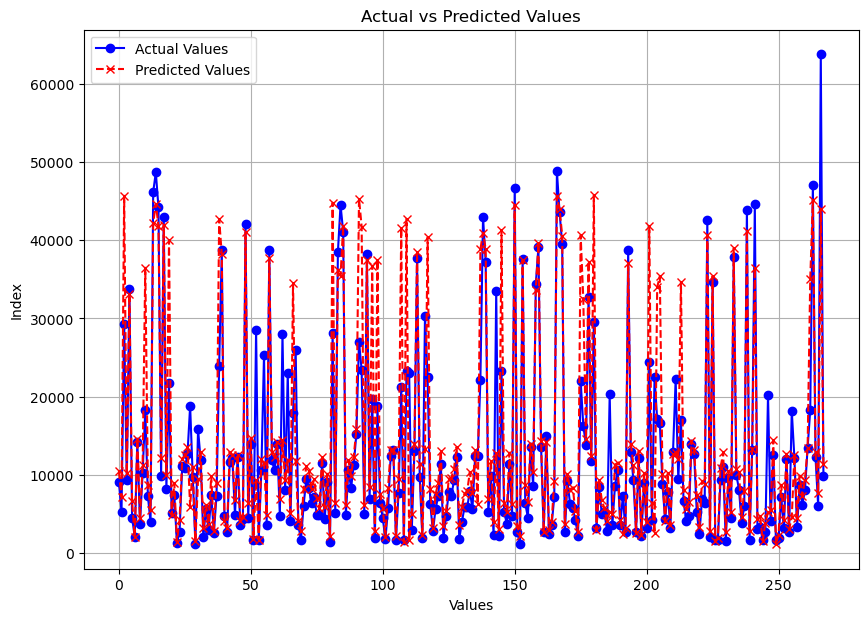

In [44]:
plt.figure(figsize=(10, 7))

plt.plot(y_test_numpy, label='Actual Values', linestyle='-', marker='o', color='b')
plt.plot(insurance_model_5_preds_squeeze, label='Predicted Values', linestyle='--', marker='x', color='r')
plt.xlabel('Values')
plt.ylabel('Index')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


In [45]:
df_y_test_pred = pd.DataFrame({'test_data' : y_test_numpy,'pred_data' : insurance_model_5_preds_squeeze})

In [46]:
df_y_test_pred

,test_data,pred_data
0,9095.06825,10428.651367
1,5272.17580,7130.733887
2,29330.98315,45671.136719
3,9301.89355,10222.474609
4,33750.29180,33105.601562
...,...,...
263,47055.53210,45126.718750
264,12222.89830,12946.084961
265,6067.12675,7652.434570
266,63770.42801,44024.472656


In [51]:
type(insurance_model_5_preds_squeeze) ,type(y_test_numpy)

(numpy.ndarray, numpy.ndarray)

In [48]:
y_true = y_test_numpy
y_pred = insurance_model_5_preds_squeeze

In [50]:
def mae(y_true,y_pred):
    return tf.keras.metrics.mae(y_true = y_test_numpy,y_pred = insurance_model_5_preds_squeeze).numpy()

def mse(y_true,y_pred):
    return tf.keras.metrics.mse(y_true = y_test_numpy,y_pred = insurance_model_5_preds_squeeze).numpy()

mae(y_true,y_pred) , mse(y_true,y_pred)

(3572.2744, 44439852.0)